In [1]:
import pandas as pd 
import random as rnd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
lakers = pd.read_csv('lakers.csv')

In [3]:
bucks = pd.read_csv('bucks.csv')

In [4]:
finaldf = pd.concat([bucks,lakers])

In [5]:
finaldf.columns #just need 3 columns -- 'TEAM_ABBREVIATION','GAME_DATE','PTS' 
#we are using PTS for the distributions, LAKERS points scored distribution vs BUCKS points scored distribution 

Index(['Unnamed: 0', 'SEASON_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME',
       'GAME_ID', 'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'PTS', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PLUS_MINUS'],
      dtype='object')

In [6]:
lakersf = finaldf[finaldf.TEAM_ABBREVIATION == 'LAL']
bucksf = finaldf[finaldf.TEAM_ABBREVIATION == 'MIL'] 

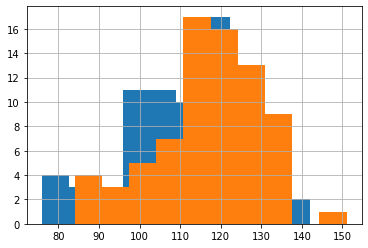

In [7]:
lakersf.PTS.hist() #blue
bucksf.PTS.hist() #orange 

In [8]:
lakersmeanpts = lakersf.PTS.mean()
bucksmeanpts = bucksf.PTS.mean()
lakerssdpts = lakersf.PTS.std()
buckssdpts = bucksf.PTS.std()

print("LAKERS Points Mean ", lakersmeanpts)
print("LAKERS SD ", lakerssdpts)
print("BUCKS Mean ", bucksmeanpts)
print("BUCKS SD ", buckssdpts)



LAKERS Points Mean  111.06493506493507
LAKERS SD  14.226862714354713
BUCKS Mean  116.96
BUCKS SD  13.3086438076913


In [9]:
rnd.gauss(lakersmeanpts,lakerssdpts) #"GAUSSCIAN" allows to randomly sample distribution 

111.62807624653392

In [12]:
def gameSim():
    LAKERSscore = rnd.gauss(lakersmeanpts,lakerssdpts)
    BUCKSscore = rnd.gauss(bucksmeanpts,buckssdpts)
    if int(round(LAKERSscore)) > int(round(BUCKSscore)):
        return 1 #lakers won
    elif int(round(LAKERSscore)) < int(round(BUCKSscore)):
        return -1 #bucks won 
    else: return 0
    
gameSim()

-1

In [13]:
def gamesSim(game7):
    gamesout = []
    team1win = 0
    team2win = 0
    tie = 0
    for i in range(game7):
        gm = gameSim()
        gamesout.append(gm)
        if gm == 1:
            team1win +=1 
        elif gm == -1:
            team2win +=1
        else: tie +=1 
    print('LAKERS Win ', team1win/(team1win+team2win+tie),'%')
    print('BUCKS Win ', team2win/(team1win+team2win+tie),'%')
    print('Tie ', tie/(team1win+team2win+tie), '%')
    return gamesout

In [14]:
gamesSim(7)

LAKERS Win  0.5714285714285714 %
BUCKS Win  0.42857142857142855 %
Tie  0.0 %


[1, -1, -1, -1, 1, 1, 1]